# Prediction of Promotion in HR Dataset Using Classfication
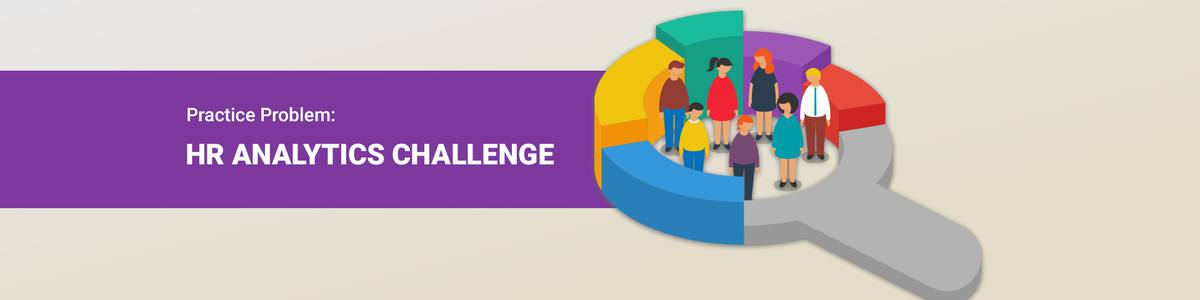

## Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

 1. They first identify a set of employees based on recommendations/ past performance.
 2. Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical.
 3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
    
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.
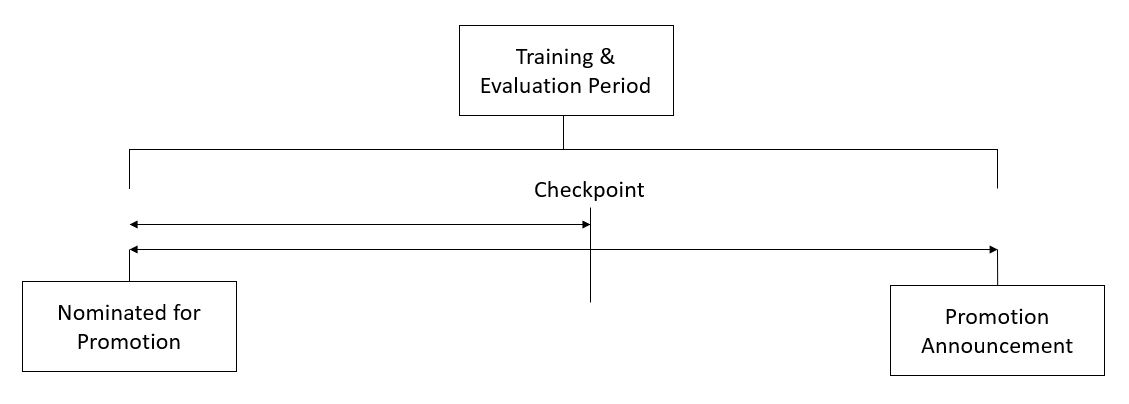 

## Aim of the dataset.

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

## Dataset Description

We have train (54808) and test (23490) data set, train data set has both input and output variable(s). You need to predict the is_promoted for the test data set.

|Variable|Definition|
|:-------:|:--------|
|employee_id|	Unique ID for employee|
|department|	Department of employee|
|region|	Region of employment (unordered)|
|education|	Education Level|
|gender|	Gender of Employee|
|recruitment_channel|	Channel of recruitment for employee|
|no_of_trainings|	no of other trainings completed in previous year on soft skills, technical skills etc.|
|age|	Age of Employee|
|previous_year_rating|	Employee Rating for the previous year|
|length_of_service|	Length of service in years|
|KPIs_met >80%|	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0|
|awards_won?|	If awards won during previous year then 1 else 0|
|avg_training_score|	Average score in current training evaluations|
|is_promoted|	(Target) Recommended for promotion|



In [6]:
# importing required libraries
import pandas as pd #
import numpy as np # linear algebra
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
import io
import os

In [7]:
# File path
%cd "E:\Data Science Projects\Hr analytics dataset" 

E:\Data Science Projects\Hr analytics dataset


In [8]:
trainhr=pd.read_csv('train_LZdllcl.csv') # importing train file

In [9]:
testhr=pd.read_csv('test_2umaH9m.csv') # Importing test file

In [10]:
trainhr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
trainhr.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [12]:
trainhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [13]:
trainhr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [14]:
trainhr.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
testhr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [16]:
testhr.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [17]:
testhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [18]:
testhr.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [19]:
testhr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [20]:
testhr['is_promoted']='test'

In [21]:
# Combine Both Dataframes for preprocessing
# For Concatenation of 2 dataframes the number of variables and squence of variables must be same.
combinedf=pd.concat([trainhr,testhr],axis=0)
# axis=0 is Row wise Concatenation

In [22]:
combinedf.education.value_counts(dropna=False)

education
Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: count, dtype: int64

In [23]:
combinedf.education=combinedf.education.fillna("Bachelor's")
#imputing the variable with Bachelor's, as the Bachelor's is most frequent in variable.

In [24]:
combinedf.education.value_counts()

education
Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: count, dtype: int64

In [25]:
combinedf.previous_year_rating.value_counts(dropna=False)

previous_year_rating
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: count, dtype: int64

In [26]:
combinedf.previous_year_rating=combinedf.previous_year_rating.fillna(3.0)
#imputing the variable with Bachelor's, as the 3.0 is most frequent in variable. And it is a categorical variable.

In [27]:
combinedf.previous_year_rating.value_counts(dropna=False)

previous_year_rating
3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

In [28]:
# as 'no_of_trainings','previous_year_rating','KPIs_met >80%', 'awards_won? adding them to objcols. and droping the 
#employee_id as it is a unique identifier and we don't require it.
combinedf.no_of_trainings=combinedf.no_of_trainings.astype('object')
combinedf.previous_year_rating=combinedf.previous_year_rating.astype('object')
combinedf['KPIs_met >80%']=combinedf['KPIs_met >80%'].astype('object')
combinedf['awards_won?']=combinedf['awards_won?'].astype('object')
combinedf=combinedf.drop('employee_id',axis=1)

In [29]:
combinedf.describe()

,age,length_of_service,avg_training_score
count,78298.000000,78298.000000,78298.000000
mean,34.797619,5.848974,63.349664
std,7.665928,4.248070,13.383664
min,20.000000,1.000000,39.000000
25%,29.000000,3.000000,51.000000
50%,33.000000,5.000000,60.000000
75%,39.000000,7.000000,76.000000
max,60.000000,37.000000,99.000000


In [30]:
#split data back to train and test for EDA(Exploratory Data Analysis) 
trainhr_EDA=combinedf[combinedf.is_promoted!='test']
testhr_EDA=combinedf[combinedf.is_promoted=='test']

### Data Visualization of categorical variables.

In [31]:
#frequency counts of is_promoted,gender,previous_year_ratnig,with pie diagram
print(trainhr_EDA.is_promoted.value_counts())

is_promoted
0    50140
1     4668
Name: count, dtype: int64


<Axes: ylabel='count'>

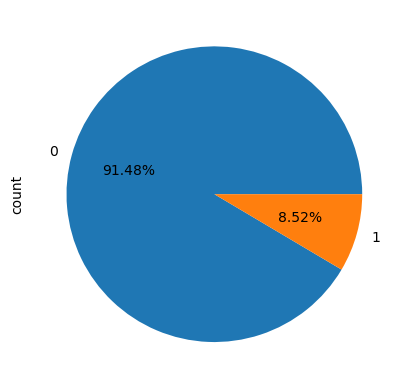

In [32]:
trainhr_EDA.is_promoted.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [33]:
print(trainhr_EDA.gender.value_counts())

gender
m    38496
f    16312
Name: count, dtype: int64


<Axes: ylabel='count'>

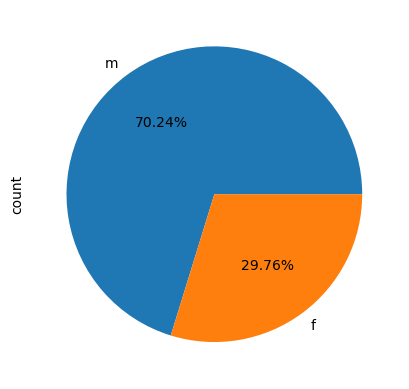

In [34]:
trainhr_EDA.gender.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [35]:
print(trainhr_EDA.previous_year_rating.value_counts())

previous_year_rating
3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64


<Axes: ylabel='count'>

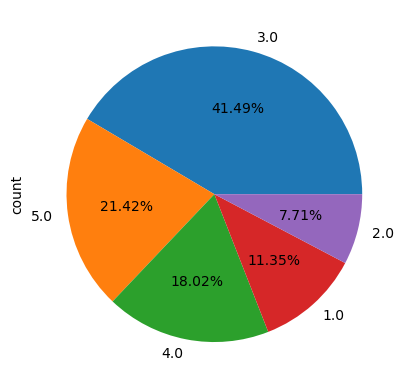

In [36]:
trainhr_EDA.previous_year_rating.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [37]:
pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA.recruitment_channel)

recruitment_channel,other,referred,sourcing
is_promoted,,,
0,27890,1004,21246
1,2556,138,1974


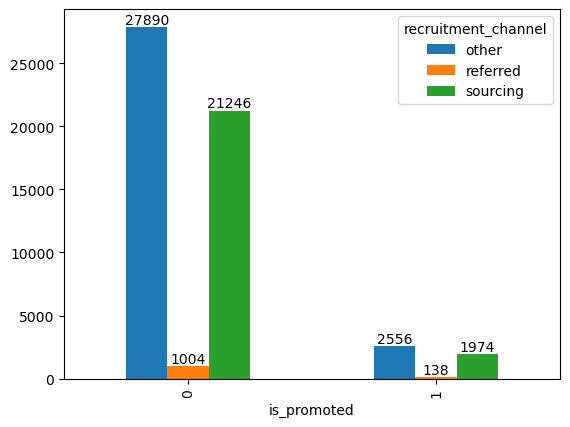

In [38]:
ax=pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA.recruitment_channel).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [39]:
pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA['KPIs_met >80%'])

KPIs_met >80%,0,1
is_promoted,,
0,34111,16029
1,1406,3262


In [40]:
pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA['awards_won?'])

awards_won?,0,1
is_promoted,,
0,49429,711
1,4109,559


# Data Aggregation

In [41]:
trainhr_EDA.age.groupby(trainhr_EDA.is_promoted).mean()

is_promoted
0    34.844037
1    34.372965
Name: age, dtype: float64

In [42]:
trainhr_EDA.age.groupby(trainhr_EDA.is_promoted).var()

is_promoted
0    59.454564
1    50.146918
Name: age, dtype: float64

### Hypothesis testing

Null hypothesis - There is no significant difference between the two given variables. (p-values greater than 0.05)

Alternative Hypothesis - There is significant difference between the two given variables.(p-values less than 0.05)

### Test Null Average avg_training_score of is_promoted Yes/No Equal  

In [43]:
trainhr_EDA.avg_training_score.groupby(trainhr_EDA.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [44]:
trainhr_EDA.avg_training_score.groupby(trainhr_EDA.is_promoted).var()

is_promoted
0    168.791268
1    217.448116
Name: avg_training_score, dtype: float64

In [45]:
one=trainhr_EDA[trainhr_EDA.is_promoted==1]
zero=trainhr_EDA[trainhr_EDA.is_promoted==0]

In [46]:
from scipy.stats import ttest_ind #importing the ttest_ind for hypothesis testing.

In [47]:
ttest_ind(one.avg_training_score,zero.avg_training_score,equal_var=False)
#since pvalue=7.662329172468838e-291 is lessthan 0.05,reject null
#Alternative Hypothesis True, There is significant difference between avg_training_score and is_promoted

TtestResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291, df=5363.307824110073)

### Test Null Average length_of_service of is_promoted Yes/No Equal  

In [48]:
trainhr_EDA.length_of_service.groupby(trainhr_EDA.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [49]:
trainhr_EDA.length_of_service.groupby(trainhr_EDA.is_promoted).var()

is_promoted
0    18.387278
1    16.062239
Name: length_of_service, dtype: float64

In [50]:
ttest_ind(one.length_of_service,zero.length_of_service,equal_var=False)
#since pvalue=0.008262946987836755 is lessthan 0.05,reject null
#Alternative Hypothesis True, There is significant difference between is_promoted and length_of_service

TtestResult(statistic=-2.6420549711884886, pvalue=0.008262946987836755, df=5708.750739466446)

### Test Null Average previous_year_rating of avg_training_score Yes/No Equal  

In [51]:
trainhr_EDA.avg_training_score.groupby(trainhr_EDA.previous_year_rating).mean()

previous_year_rating
1.0    60.064760
2.0    61.924024
3.0    64.045423
4.0    64.119773
5.0    63.781364
Name: avg_training_score, dtype: float64

In [52]:
ones=trainhr_EDA[trainhr_EDA.previous_year_rating==1.0]
two=trainhr_EDA[trainhr_EDA.previous_year_rating==2.0]
three=trainhr_EDA[trainhr_EDA.previous_year_rating==3.0]
four=trainhr_EDA[trainhr_EDA.previous_year_rating==4.0]
five=trainhr_EDA[trainhr_EDA.previous_year_rating==5.0]

In [53]:
from scipy.stats import f_oneway #importing the f_oneway for hypothesis testing.

In [54]:
f_oneway(ones.avg_training_score,two.avg_training_score,three.avg_training_score,four.avg_training_score,
         five.avg_training_score)
#since pvalue=6.957044805766572e-114) is lessthan 0.05,reject null
#Alternative Hypothesis True, There is significant difference between previous_year_rating and avg_training_score

F_onewayResult(statistic=133.71725352260415, pvalue=6.957044805766572e-114)

### Test Null Average previous_year_rating of length_of_service Yes/No Equal

In [55]:
f_oneway(ones.length_of_service,two.length_of_service,three.length_of_service,four.length_of_service,five.length_of_service)
#since pvalue=2.89045896511553e-124 is lessthan 0.05,reject null
#Alternative Hypothesis True, There is significant difference between previous_year_rating and length_of_service

F_onewayResult(statistic=145.83450031447595, pvalue=2.89045896511553e-124)

### Test Null No Association between is_promoted and gender

Null Hypothesis - There is no Association between is_promoted and gender. (p-values greater than 0.05)<br>
Alt Hypothesi - There is Association between is_promoted and gender. (p-values less than 0.05)<br>

In [56]:
#To find the relationship between two categorical we are doing chi2 test of hypothesis
from scipy.stats import chi2_contingency

In [57]:
chi2_contingency(pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA.gender))
#since pvalue=0.009765091521176657 is lessthan 0.05,reject null
#Alternative Hypothesis True, There is significant difference between the is_promoted and gender

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428, 35217.29382572],
       [ 1389.29382572,  3278.70617428]]))

### Test Null No Association between 'KPIs_met >80%' and is_promoted

In [58]:
pd.crosstab(trainhr_EDA['KPIs_met >80%'],trainhr_EDA.is_promoted)

is_promoted,0,1
KPIs_met >80%,,
0,34111,1406
1,16029,3262


In [59]:
chi2_contingency(pd.crosstab(trainhr_EDA['KPIs_met >80%'],trainhr_EDA.is_promoted))
#since pvalue=0.0 is lessthan 0.05,reject null
#Alternative Hypothesis True, There is significant difference between the is_promoted and KPIs_met >80%

Chi2ContingencyResult(statistic=2689.3220548467057, pvalue=0.0, dof=1, expected_freq=array([[32492.01539921,  3024.98460079],
       [17647.98460079,  1643.01539921]]))

### Test Null No Association between is_promoted and awards_won?

In [60]:
pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA['awards_won?'])

awards_won?,0,1
is_promoted,,
0,49429,711
1,4109,559


In [61]:
chi2_contingency(pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA['awards_won?']))
#since pvalue=0.0 is lessthan 0.05,reject null
#Alternative Hypothesis True, There is significant difference between the is_promoted and awards_won?

Chi2ContingencyResult(statistic=2098.0719210465427, pvalue=0.0, dof=1, expected_freq=array([[48978.16596117,  1161.83403883],
       [ 4559.83403883,   108.16596117]]))

### Spliting data into numeric cols and object cols

In [62]:
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

In [63]:
numcols.head()

,age,length_of_service,avg_training_score
0,35,8,49
1,30,4,60
2,34,7,50
3,39,10,50
4,45,2,73


In [64]:
objcols.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,5.0,1,0,0
1,Operations,region_22,Bachelor's,m,other,1,5.0,0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.0,0,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,1.0,0,0,0
4,Technology,region_26,Bachelor's,m,other,1,3.0,0,0,0


In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
objcols=pd.get_dummies(objcols,columns=['department', 'region', 'education','gender','recruitment_channel','no_of_trainings',
                                  'previous_year_rating','KPIs_met >80%','awards_won?'])

In [67]:
objcols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78298 entries, 0 to 23489
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   is_promoted                   78298 non-null  object
 1   department_Analytics          78298 non-null  bool  
 2   department_Finance            78298 non-null  bool  
 3   department_HR                 78298 non-null  bool  
 4   department_Legal              78298 non-null  bool  
 5   department_Operations         78298 non-null  bool  
 6   department_Procurement        78298 non-null  bool  
 7   department_R&D                78298 non-null  bool  
 8   department_Sales & Marketing  78298 non-null  bool  
 9   department_Technology         78298 non-null  bool  
 10  region_region_1               78298 non-null  bool  
 11  region_region_10              78298 non-null  bool  
 12  region_region_11              78298 non-null  bool  
 13  region_region_12     

In [68]:
combined_df=pd.concat([numcols,objcols],axis=1)
combined_df.head()

,age,length_of_service,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,no_of_trainings_10,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,35,8,49,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
1,30,4,60,0,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,True,False
2,34,7,50,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
3,39,10,50,0,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,45,2,73,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [69]:
combined_df=combined_df.replace({True:1,False:0})

In [70]:
trainhr_df=combined_df[combined_df.is_promoted!='test']
testhr_df=combined_df[combined_df.is_promoted=='test']

In [71]:
trainhr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54808 entries, 0 to 54807
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           54808 non-null  int64 
 1   length_of_service             54808 non-null  int64 
 2   avg_training_score            54808 non-null  int64 
 3   is_promoted                   54808 non-null  object
 4   department_Analytics          54808 non-null  int64 
 5   department_Finance            54808 non-null  int64 
 6   department_HR                 54808 non-null  int64 
 7   department_Legal              54808 non-null  int64 
 8   department_Operations         54808 non-null  int64 
 9   department_Procurement        54808 non-null  int64 
 10  department_R&D                54808 non-null  int64 
 11  department_Sales & Marketing  54808 non-null  int64 
 12  department_Technology         54808 non-null  int64 
 13  region_region_1      

In [72]:
testhr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23490 entries, 0 to 23489
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           23490 non-null  int64 
 1   length_of_service             23490 non-null  int64 
 2   avg_training_score            23490 non-null  int64 
 3   is_promoted                   23490 non-null  object
 4   department_Analytics          23490 non-null  int64 
 5   department_Finance            23490 non-null  int64 
 6   department_HR                 23490 non-null  int64 
 7   department_Legal              23490 non-null  int64 
 8   department_Operations         23490 non-null  int64 
 9   department_Procurement        23490 non-null  int64 
 10  department_R&D                23490 non-null  int64 
 11  department_Sales & Marketing  23490 non-null  int64 
 12  department_Technology         23490 non-null  int64 
 13  region_region_1      

In [73]:
testhr_df=testhr_df.drop('is_promoted',axis=1)

In [74]:
testhr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23490 entries, 0 to 23489
Data columns (total 73 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           23490 non-null  int64
 1   length_of_service             23490 non-null  int64
 2   avg_training_score            23490 non-null  int64
 3   department_Analytics          23490 non-null  int64
 4   department_Finance            23490 non-null  int64
 5   department_HR                 23490 non-null  int64
 6   department_Legal              23490 non-null  int64
 7   department_Operations         23490 non-null  int64
 8   department_Procurement        23490 non-null  int64
 9   department_R&D                23490 non-null  int64
 10  department_Sales & Marketing  23490 non-null  int64
 11  department_Technology         23490 non-null  int64
 12  region_region_1               23490 non-null  int64
 13  region_region_10              23490 

### Splitting trainhr_df into X and y for building Machine Learing models 

In [75]:
y=trainhr_df.is_promoted
X=trainhr_df.drop('is_promoted',axis=1)

In [76]:
X.head()

,age,length_of_service,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,...,no_of_trainings_10,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,35,8,49,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,30,4,60,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
2,34,7,50,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,39,10,50,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,45,2,73,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [77]:
y.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

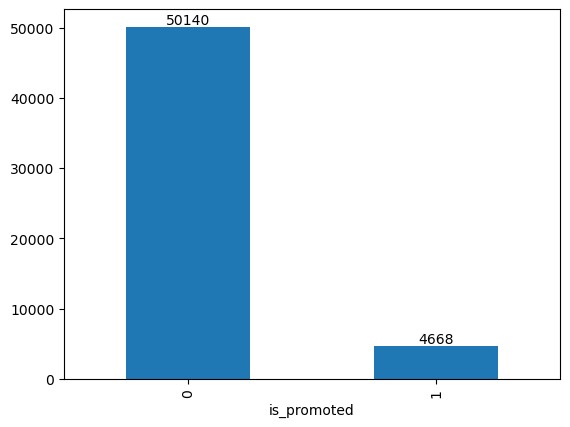

In [78]:
ax=y.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='count', ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

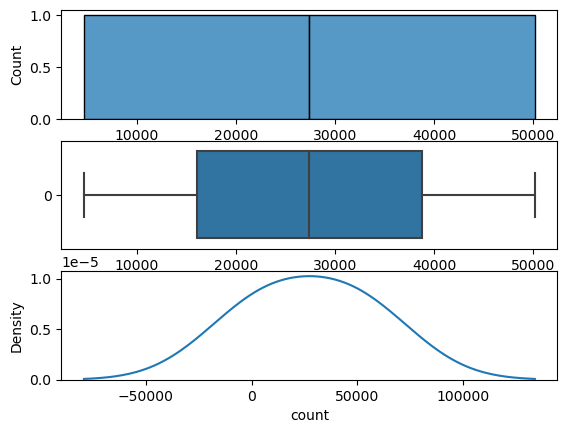

In [79]:
#histogram,boxplot,density curve of y
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(y.value_counts(),ax=ax[0])
sns.boxplot(y.value_counts(),orient='h',ax=ax[1])
sns.kdeplot(y.value_counts(),ax=ax[2])

In [80]:
# we need to use labelencoder for dependent variable(y), to change dependent variable to 0's and 1's
from sklearn.preprocessing import LabelEncoder

In [81]:
y=LabelEncoder().fit_transform(y)

# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logit=LogisticRegression(max_iter=3000)

In [84]:
logitmodel=logit.fit(X,y)

In [85]:
logitmodel.score(X,y)

0.9315063494380382

In [86]:
logitpredict=logitmodel.predict(X)

In [87]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,49833,307
1,3447,1221


In [88]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [89]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     50140
           1       0.80      0.26      0.39      4668

    accuracy                           0.93     54808
   macro avg       0.87      0.63      0.68     54808
weighted avg       0.92      0.93      0.92     54808



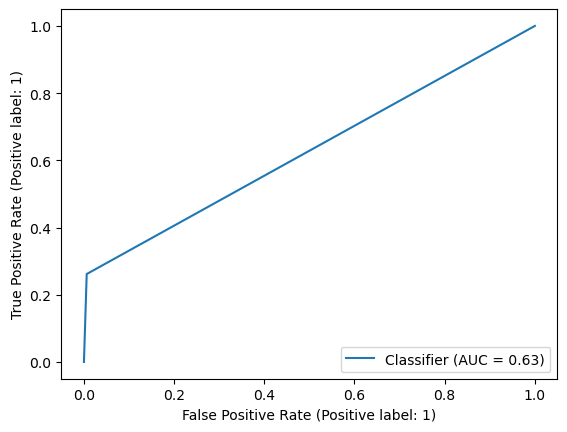

In [90]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [91]:
cross_val_score(logit,X,y)

C:\Users\hp\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.93258529, 0.93012224, 0.93057836, 0.93321777, 0.93075449])

In [92]:
np.mean([0.93258529, 0.93030469, 0.93048714, 0.93312654, 0.93075449])

0.9314516300000001

In [93]:
logittest=logitmodel.predict(testhr_df)

In [94]:
pd.DataFrame(logittest).to_csv("Logit.csv")

# Decission Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
tree=DecisionTreeClassifier(max_depth=10)

In [97]:
treemodel=tree.fit(X,y)

In [98]:
treemodel.score(X,y)

0.9420705006568384

In [99]:
cross_val_score(tree,X,y)

array([0.93769385, 0.93650794, 0.93878854, 0.93841803, 0.93796186])

In [100]:
np.mean([0.9378763 , 0.93632549, 0.93887977, 0.93850926, 0.93787063])

0.93789229

In [101]:
treetest_X=treemodel.predict(X)

In [102]:
pd.crosstab(y,treetest_X)

col_0,0,1
row_0,,
0,50057,83
1,3092,1576


In [103]:
print(classification_report(y,treetest_X))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     50140
           1       0.95      0.34      0.50      4668

    accuracy                           0.94     54808
   macro avg       0.95      0.67      0.73     54808
weighted avg       0.94      0.94      0.93     54808



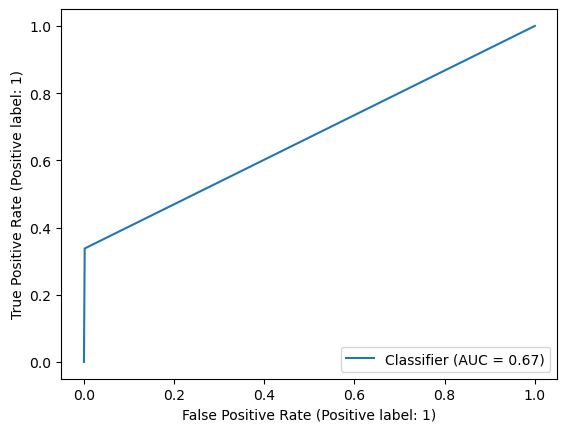

In [104]:
RocCurveDisplay.from_predictions(y,treetest_X)

In [105]:
treetest=treemodel.predict(testhr_df)

In [106]:
pd.DataFrame(treetest).to_csv('tree2.csv')

# Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
RF=RandomForestClassifier(max_depth=5)

In [109]:
RFmodel=RF.fit(X,y)

In [110]:
RFmodel.score(X,y)

0.9184972996642826

In [111]:
cross_val_score(RF,X,y)

array([0.92008758, 0.9175333 , 0.9171684 , 0.9220874 , 0.91944166])

In [112]:
np.mean([0.91899288, 0.91698595, 0.91808064, 0.91925919, 0.91898549])

0.9184608300000001

In [113]:
rfpredict_X=RFmodel.predict(X)

In [114]:
pd.crosstab(y,rfpredict_X)

col_0,0,1
row_0,,
0,50140,0
1,4467,201


In [115]:
print(classification_report(y,rfpredict_X))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       1.00      0.04      0.08      4668

    accuracy                           0.92     54808
   macro avg       0.96      0.52      0.52     54808
weighted avg       0.93      0.92      0.88     54808



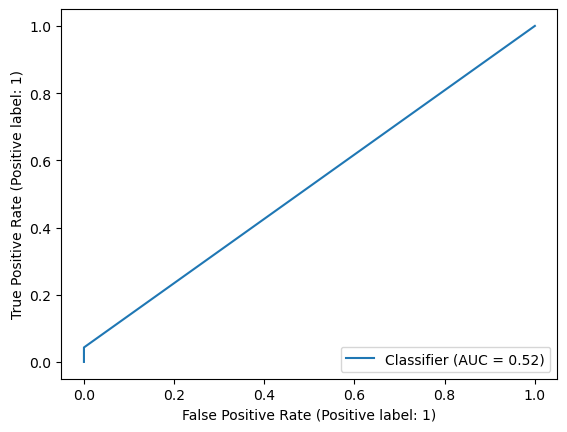

In [116]:
RocCurveDisplay.from_predictions(y,rfpredict_X)

In [117]:
RFpredict=RFmodel.predict(testhr_df)

In [118]:
pd.DataFrame(RFpredict).to_csv('RF.csv')

# Gradient Boosting Machine

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
gbc=GradientBoostingClassifier(max_depth=4,n_estimators=100)

In [121]:
gbcmodel=gbc.fit(X,y)

In [122]:
gbcmodel.score(X,y)

0.9431652313530872

In [123]:
gbcpredict_X=gbcmodel.predict(X)

In [124]:
pd.crosstab(y,gbcpredict_X)

col_0,0,1
row_0,,
0,50095,45
1,3070,1598


In [125]:
cross_val_score(gbc,X,y)

array([0.94189017, 0.93997446, 0.94061303, 0.94343582, 0.94188486])

In [126]:
np.mean([0.94189017, 0.93997446, 0.94061303, 0.94343582, 0.94188486])

0.941559668

In [127]:
print(classification_report(y,gbcpredict_X))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     50140
           1       0.97      0.34      0.51      4668

    accuracy                           0.94     54808
   macro avg       0.96      0.67      0.74     54808
weighted avg       0.94      0.94      0.93     54808



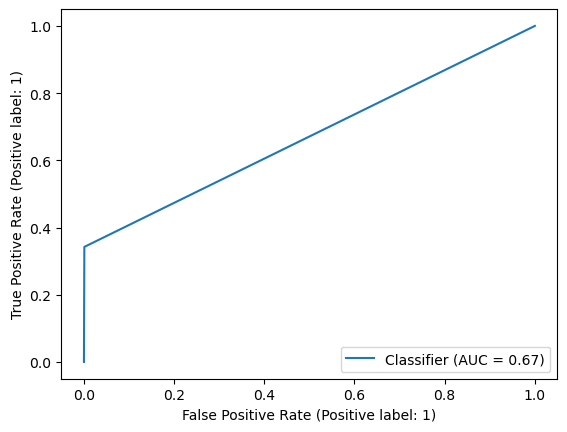

In [128]:
RocCurveDisplay.from_predictions(y,gbcpredict_X)

In [129]:
gbcpredict=gbcmodel.predict(testhr_df)

In [130]:
pd.DataFrame(gbcpredict).to_csv('gbc1.csv')

# Naive Bayes

In [131]:
from sklearn.naive_bayes import MultinomialNB

In [132]:
mul=MultinomialNB()

In [133]:
mulmodel=mul.fit(X,y)

In [134]:
mulmodel.score(X,y)

0.8948146256021019

In [135]:
mulpredict_X=mulmodel.predict(X)

In [136]:
pd.crosstab(y,mulpredict_X)

col_0,0,1
row_0,,
0,47995,2145
1,3620,1048


In [137]:
cross_val_score(mul,X,y)

array([0.8934501 , 0.89363255, 0.88943623, 0.89663352, 0.90000912])

In [138]:
np.mean([0.8934501 , 0.89363255, 0.88943623, 0.89663352, 0.90000912])

0.8946323039999999

In [139]:
print(classification_report(y,mulpredict_X))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     50140
           1       0.33      0.22      0.27      4668

    accuracy                           0.89     54808
   macro avg       0.63      0.59      0.60     54808
weighted avg       0.88      0.89      0.89     54808



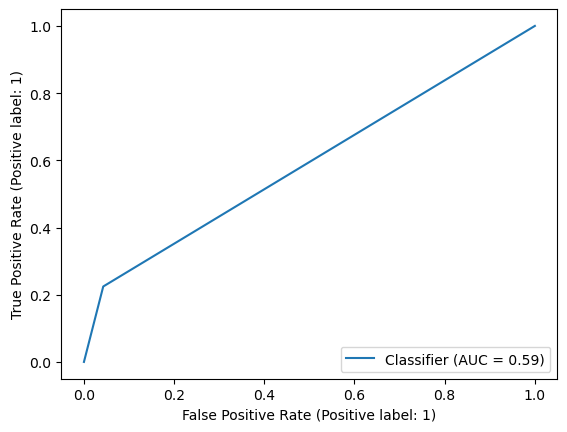

In [140]:
RocCurveDisplay.from_predictions(y,mulpredict_X)

In [141]:
mulpredict=mulmodel.predict(testhr_df)

In [142]:
pd.DataFrame(mulpredict).to_csv('mul.csv')

# GaussianNB(Naive Bayes)

In [143]:
from sklearn.naive_bayes import GaussianNB

In [144]:
nbg=GaussianNB()

In [145]:
nbgmodel=nbg.fit(X,y)

In [146]:
nbgmodel.score(X,y)

0.31084878119982484

In [147]:
nbgpredict_X=nbgmodel.predict(X)

In [148]:
cross_val_score(nbg,X,y)

array([0.28434592, 0.31308155, 0.32411969, 0.30581151, 0.29404251])

In [149]:
np.mean([0.28434592, 0.31308155, 0.32411969, 0.30581151, 0.29404251])

0.304280236

In [150]:
pd.crosstab(y,nbgpredict_X)

col_0,0,1
row_0,,
0,12717,37423
1,348,4320


In [151]:
print(classification_report(y,nbgpredict_X))

              precision    recall  f1-score   support

           0       0.97      0.25      0.40     50140
           1       0.10      0.93      0.19      4668

    accuracy                           0.31     54808
   macro avg       0.54      0.59      0.29     54808
weighted avg       0.90      0.31      0.38     54808



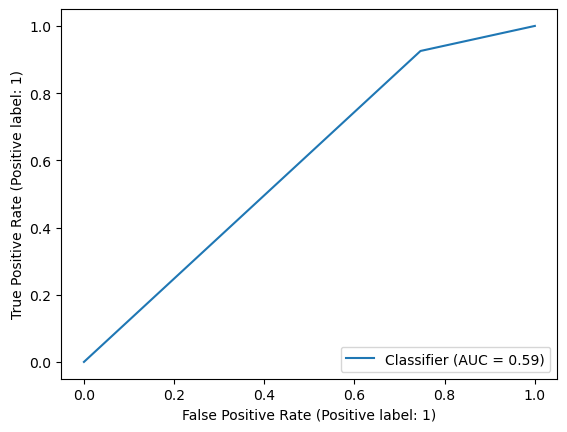

In [152]:
RocCurveDisplay.from_predictions(y,nbgpredict_X)

In [153]:
nbgpredict=nbgmodel.predict(testhr_df)

In [154]:
pd.DataFrame(nbgpredict).to_csv('nbg.csv')

## BernouliNB

In [155]:
from sklearn.naive_bayes import BernoulliNB

In [156]:
bb=BernoulliNB()

In [157]:
bbmodel=bb.fit(X,y)

In [158]:
bbmodel.score(X,y)

0.873357903955627

In [159]:
bbpredict_X=bbmodel.predict(X)

In [160]:
pd.crosstab(y,bbpredict_X)

col_0,0,1
row_0,,
0,46689,3451
1,3490,1178


In [161]:
print(classification_report(y,bbpredict_X))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     50140
           1       0.25      0.25      0.25      4668

    accuracy                           0.87     54808
   macro avg       0.59      0.59      0.59     54808
weighted avg       0.87      0.87      0.87     54808



In [162]:
cross_val_score(bb,X,y)

array([0.87210363, 0.87438424, 0.87465791, 0.86780403, 0.8716358 ])

In [163]:
np.mean([0.87210363, 0.87438424, 0.87465791, 0.86780403, 0.8716358 ])

0.8721171219999999

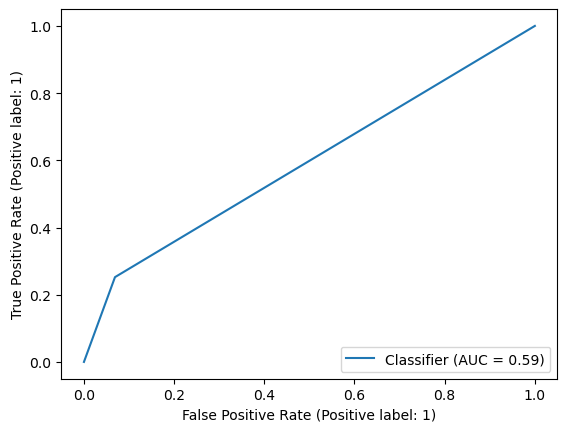

In [164]:
RocCurveDisplay.from_predictions(y,bbpredict_X)

In [165]:
bbpredict=bbmodel.predict(testhr_df)

In [166]:
pd.DataFrame(bbpredict).to_csv('bb.csv')

# SVC

In [167]:
from sklearn.svm import SVC

In [168]:
svc=SVC(C=3)

In [169]:
svcmodel=svc.fit(X,y)

In [ ]:
svcmodel.score(X,y)

In [ ]:
svcpredict_X=svcmodel.predict(X)

In [ ]:
cross_val_score(svc,X,y)

In [ ]:
np.mean([0.91871921, 0.91899288, 0.91817187, 0.91916796, 0.91898549])

In [ ]:
pd.crosstab(y,svcpredict_X)

In [ ]:
print(classification_report(y,svcpredict_X))

In [ ]:
RocCurveDisplay.from_predictions(y,svcpredict_X)

In [ ]:
svcpredict=svcmodel.predict(testhr_df)

In [ ]:
pd.DataFrame(svcpredict).to_csv('svc.csv')

In [ ]:
from imblearn.over_sampling import SMOTE # importing the smote as the data is been oversampled

In [ ]:
oversample = SMOTE()

In [ ]:
X_smote,y_smote = oversample.fit_resample(X, y)

# Logistic Regression with smote

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit_smote=LogisticRegression(max_iter=3000)

In [ ]:
logitmodel_smote=logit_smote.fit(X_smote,y_smote)

In [ ]:
logitmodel_smote.score(X_smote,y_smote)

In [ ]:
logitpredict_smote=logitmodel_smote.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,logitpredict_smote)

In [ ]:
print(classification_report(y_smote,logitpredict_smote))

In [ ]:
RocCurveDisplay.from_predictions(y_smote,logitpredict_smote)

In [ ]:
cross_val_score(logit_smote,X_smote,y_smote)

In [ ]:
np.mean([0.77572796, 0.98638811, 0.98708616, 0.98913043, 0.98798365])

In [ ]:
logittest=logitmodel_smote.predict(testhr_df)

In [ ]:
pd.DataFrame(logittest).to_csv("Logit_smote.csv")

# Decission Tree with smote

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_smote=DecisionTreeClassifier(max_depth=10)

In [ ]:
treemodel_smote=tree_smote.fit(X_smote,y_smote)

In [ ]:
treemodel_smote.score(X_smote,y_smote)

In [ ]:
cross_val_score(tree_smote,X_smote,y_smote)

In [ ]:
np.mean([0.80699043, 0.8747507 , 0.8704627 , 0.86408057, 0.86911647])

In [ ]:
treetest_X_smote=treemodel_smote.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,treetest_X_smote)

In [ ]:
print(classification_report(y_smote,treetest_X_smote))

In [ ]:
RocCurveDisplay.from_predictions(y_smote,treetest_X_smote)

In [ ]:
treetest=treemodel_smote.predict(testhr_df)

In [ ]:
pd.DataFrame(treetest).to_csv('tree1_smote.csv')

# Random Forest with smote

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_smote=RandomForestClassifier(max_depth=5)

In [ ]:
RFmodel_smote=RF_smote.fit(X_smote,y_smote)

In [ ]:
RFmodel_smote.score(X_smote,y_smote)

In [ ]:
cross_val_score(RF_smote,X_smote,y_smote)

In [ ]:
np.mean([0.75857599, 0.79617072, 0.78799362, 0.78819306, 0.80275229])

In [ ]:
rfpredict_X_smote=RFmodel_smote.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,rfpredict_X_smote)

In [ ]:
print(classification_report(y_smote,rfpredict_X_smote))

In [ ]:
RocCurveDisplay.from_predictions(y_smote,rfpredict_X_smote)

In [ ]:
RFpredict=RFmodel_smote.predict(testhr_df)

In [ ]:
pd.DataFrame(RFpredict).to_csv('RF_smote.csv')

# Gradient Boosting Machine with smote

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_smote=GradientBoostingClassifier(max_depth=4,n_estimators=100)

In [ ]:
gbcmodel_smote=gbc_smote.fit(X_smote,y_smote)

In [ ]:
gbcmodel_smote.score(X_smote,y_smote)

In [ ]:
gbcpredict_X_smote=gbcmodel_smote.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,gbcpredict_X_smote)

In [ ]:
cross_val_score(gbc_smote,X_smote,y_smote)

In [ ]:
np.mean([0.8061428 , 0.96046071, 0.95796769, 0.96165736, 0.96125848])

In [ ]:
print(classification_report(y_smote,gbcpredict_X_smote))

In [ ]:
RocCurveDisplay.from_predictions(y_smote,gbcpredict_X_smote)

In [ ]:
gbcpredict_smote=gbcmodel_smote.predict(testhr_df)

In [ ]:
pd.DataFrame(gbcpredict).to_csv('gbc_smote.csv')

# MultinomialNB(Naive Bayes) with smote

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mul_smote=MultinomialNB()

In [ ]:
mulmodel_smote=mul_smote.fit(X_smote,y_smote)

In [ ]:
mulmodel_smote.score(X_smote,y_smote)

In [ ]:
mulpredict_X_smote=mulmodel_smote.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,mulpredict_X_smote)

In [ ]:
cross_val_score(mul_smote,X_smote,y_smote)

In [ ]:
np.mean([0.8934501 , 0.89363255, 0.88943623, 0.89663352, 0.90000912])

In [ ]:
print(classification_report(y_smote,mulpredict_X_smote))

In [ ]:
RocCurveDisplay.from_predictions(y_smote,mulpredict_X_smote)

In [ ]:
mulpredict=mulmodel_smote.predict(testhr_df)

In [ ]:
pd.DataFrame(mulpredict).to_csv('mul_smote.csv')

# GaussianNB with smote

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbg_smote=GaussianNB()

In [ ]:
nbgmodel_smote=nbg_smote.fit(X_smote,y_smote)

In [ ]:
nbgmodel_smote.score(X_smote,y_smote)

In [ ]:
nbgpredict_X_smote=nbgmodel_smote.predict(X_smote)

In [ ]:
cross_val_score(nbg_smote,X_smote,y_smote)

In [ ]:
np.mean([0.28434592, 0.31308155, 0.32411969, 0.30581151, 0.29404251])

In [ ]:
pd.crosstab(y_smote,nbgpredict_X_smote)

In [ ]:
print(classification_report(y_smote,nbgpredict_X_smote))

In [ ]:
RocCurveDisplay.from_predictions(y_smote,nbgpredict_X_smote)

In [ ]:
gnbpredict_smote=nbgmodel_smote.predict(testhr_df)

In [ ]:
pd.DataFrame(gnbpredict_smote).to_csv('gnb_smote.csv')

# BernouliNB with smote

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bb_smote=BernoulliNB()

In [ ]:
bbmodel_smote=bb_smote.fit(X_smote,y_smote)

In [ ]:
bbmodel_smote.score(X_smote,y_smote)

In [ ]:
bbpredict_X_smote=bbmodel_smote.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,bbpredict_X_smote)

In [ ]:
print(classification_report(y_smote,bbpredict_X_smote))

In [ ]:
cross_val_score(bb_smote,X_smote,y_smote)

In [ ]:
np.mean([0.87210363, 0.87438424, 0.87465791, 0.86780403, 0.8716358 ])

In [ ]:
RocCurveDisplay.from_predictions(y_smote,bbpredict_X_smote)

In [ ]:
bbpredict_smote=bbmodel_smote.predict(testhr_df)

In [ ]:
pd.DataFrame(bbpredict).to_csv('bb_smote.csv')

# SVC with smote

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_smote=SVC(C=3)

In [ ]:
svcmodel_smote=svc_smote.fit(X_smote,y_smote)

In [ ]:
svcmodel_smote.score(X_smote,y_smote)

In [ ]:
svcpredict_X_smote=svcmodel_smote.predict(X_smote)

In [ ]:
cross_val_score(svc_smote,X_smote,y_smote)

In [ ]:
np.mean([0.91871921, 0.91899288, 0.91817187, 0.91916796, 0.91898549])

In [ ]:
pd.crosstab(y_smote,svcpredict_X_smote)

In [ ]:
print(classification_report(y_smote,svcpredict_X_smote))

In [ ]:
RocCurveDisplay.from_predictions(y_smote,svcpredict_X_smote)

In [ ]:
svcpredict_smote=svcmodel_smote.predict(testhr_df)

In [ ]:
pd.DataFrame(svcpredict).to_csv('svc_smote.csv')

# Validating the Scores in Analytics vidya

## Summary

The following text is a summary of the machine learning models that we applied to the HR dataset, along with some additional information such as the ROC/AOC curve. We have also included a table that shows the scores of each model on different metrics, such as accuracy, ML model score, ROC/AOC curve value.

| Model | ML model Score | ML model Score with smote| Accuracy Score | ROC/AUC | ROC/AUC with smote |
|:------|:--------------:|:-------------:|:------:|:------:|:--:|
|Logistic Regression|0.9317070500656839|0.955684084563223|0.391025641025641|0.63|0.96|
|Decision tree|0.9420340096336302|0.8640406860789789|0.382229673093043|0.67|0.86|
|Random Forest|0.919683257918552|0.787345432788193|0.309124767225326|0.53|0.779|
|**Gradient boosting machines**|**0.9431652313530872**|**0.9409652971679298**|**0.492362982929021**|**0.67**|**0.94**|
|Multinomial Naive Bayes|0.8948146256021019|0.8368667730355006|0.304067321178121|0.59|0.84|
|Gaussian Naive Bayes|0.31084878119982484|0.7695552453131232|0.304067321178121|0.59|0.77|
|Bernoulli Naive Bayes|0.873357903955627|0.8173015556441963|0.299216851201728|0.59|0.82|
|Support Vector Classifier|0.9209786892424464|0.925109692859992|0.438823529411765|0.54|0.93|

Based on the table, we can conclude that the best model for the HR dataset is the gradient boosting machine, as it has the highest scores on all the metrics, especially the ML model score and the ROC/AOC curve value, which indicate how well the model can classify the data and how well it can distinguish between different classes.

We can also compare the gradient boosting machine with other models to see how much better it performs. For example, the logistic regression model has a similar ROC/AOC curve value of 0.90, but a much lower ML model score of 0.90 and a lower accuracy score of 0.39, which means that it is not as good at predicting the outcomes of the data as the gradient boosting machine.

Similarly, the support vector classifier has a high ROC/AOC curve value of 0.94, but a lower ML model score of 0.94 and a lower accuracy score of 0.44, which means that it is not as good at fitting the data as the gradient boosting machine.

The other models have even lower scores on all the metrics, which shows that they are not suitable for the HR dataset.